In [1]:
import tensorflow as tf
mnist = tf.keras.datasets.fashion_mnist
(training_images,training_labels),(test_images,test_labels) =mnist.load_data()
### .reshape()转化为4维张量
training_images = training_images.reshape(60000, 28, 28, 1)
training_images = training_images / 255.0
### .reshape()
test_images = test_images.reshape(10000, 28, 28, 1)
test_images = test_images / 255.0
model = tf.keras.models.Sequential([
    ### 加入卷积层
    tf.keras.layers.Conv2D(filters=32,kernel_size=(3,3),input_shape=(28,28,1),activation='relu',padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3),activation='relu',padding='same'),
    tf.keras.layers.Dropout(rate=0.3),
    tf.keras.layers.MaxPooling2D(pool_size=(2,2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128,activation='relu'),
    tf.keras.layers.Dense(10,activation='softmax')

])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy',metrics=['accuracy'])
### 使用model.summary()查看每一层输出的模型
model.summary()
# model.fit(training_images, training_labels, epochs=60,batch_size=100,verbose=2)
train_history=model.fit(training_images,training_labels,validation_split=0.2,epochs=20,batch_size=100,verbose=2)
# test_loss = model.evaluate(test_images,test_labels)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
dropout (Dropout)            (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

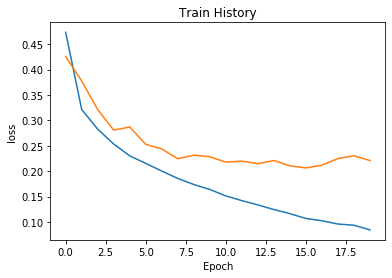

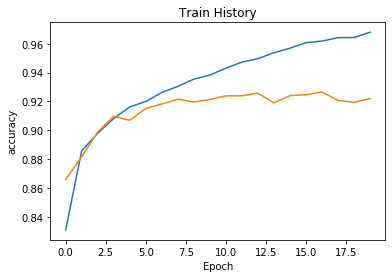

In [2]:
import matplotlib.pyplot as plt
# 可视化
def show_train_history(train_history,train_metric,val_metric):
    plt.plot(train_history.history[train_metric])
    plt.plot(train_history.history[val_metric])
    plt.title('Train History')
    plt.ylabel(train_metric)
    plt.xlabel('Epoch')
    plt.show()
show_train_history(train_history,'loss','val_loss')
show_train_history(train_history,'accuracy','val_accuracy')

In [3]:
#评估模型
test_loss,test_acc=model.evaluate(test_images,test_labels,verbose=2)
print('Test accuracy:',test_acc)

10000/10000 - 6s - loss: 0.2374 - accuracy: 0.9235
Test accuracy: 0.9235


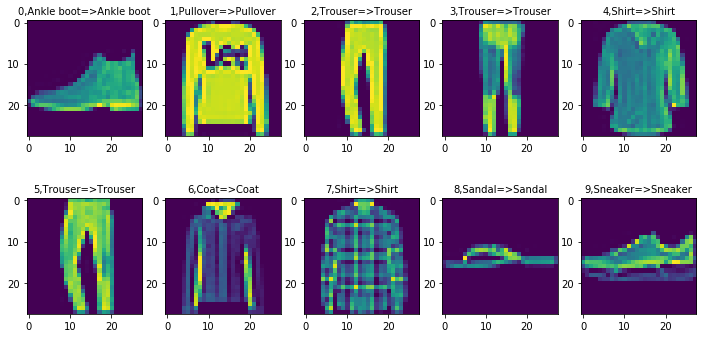

In [4]:


label_dict={0:"T-shirt",1:"Trouser",2:"Pullover",3:"Dress",
            4:"Coat",5:"Sandal",6:"Shirt",
            7:"Sneaker",8:"Bag",9:"Ankle boot"}

preds=model.predict_classes(test_images)
#定义显示图像数据及其对应标签的函数
#images：图片列表，labels：标签列表，preds:预测值列表，index:从第index个开始显示，num:缺省一次显示5幅


def plot_images_labels_prediction(images,labels,preds,index,num=5):
    fig=plt.gcf()#获取当前图标，Get Current Figure
    fig.set_size_inches(12,6)#1英寸等于2.54cm
    if num>10:
        num=10 #最多显示10个子图
    for i in range(0,num):
        ax=plt.subplot(2,5,i+1)#获取当前要处理的子图
        ax.imshow(images[index])
        title=str(i)+','+label_dict[labels[index]]#构建该图上要显示的title信息
        if len(preds)>0:
            title += '=>' + label_dict[preds[index]]
        ax.set_title(title,fontsize=10)#显示图上的title信息
        index += 1
    plt.show()
plot_images_labels_prediction(test_images[:,:,:,0],test_labels,preds,0,10)
